<a href="https://colab.research.google.com/github/WoodaBaker/Python-Projects/blob/master/Brain_MRI_Images_For_Brain_Tumor_Detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Tumor detection from MRI Images

For the following dataset, I will be looking to classify (Binary classification) whether or not (yes or no) a tumor is present in the MRI Images. 

## 1. Problem
Differentiate between tumor and non-tumor.

## 2. Data
The data being used is from kaggle's BRain Tumor Dataset(Yes or No Tumro images)

https://www.kaggle.com/datasets/navoneel/brain-mri-images-for-brain-tumor-detection

## 3. Evaluation
The evaluation is a binary classifier that will return a 1 or 0.

## 4. Features 

Some information about the data:

  - There are a total of 253 images
    - 98 No tumor
    - 155 Yes tumor

In [2]:
# Import Tensor tools
import tensorflow as tf
import tensorflow_hub as hub
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np
from IPython.display import Image
print("TF version:", tf.__version__)
print("TF Hub version:", hub.__version__)

# Check GPU availability
print("GPU", "available (YES!)" if tf.config.list_physical_devices("GPU") else "not available:(")

TF version: 2.8.2
TF Hub version: 0.12.0
GPU not available:(


In [3]:
import pandas as pd
labels_csv = pd.read_csv("/content/drive/MyDrive/Brain Tumor Data/Brain_Tumor_Labels.csv - Sheet1 (1).csv")
print(labels_csv.describe())
print(labels_csv.head())

            ID Brain_Tumor
count      253         253
unique     253           2
top     N1.jpg         Yes
freq         1         155
       ID Brain_Tumor
0  N1.jpg          No
1  N2.jpg          No
2  N3.jpg          No
3  N4.jpg          No
4  N5.jpg          No


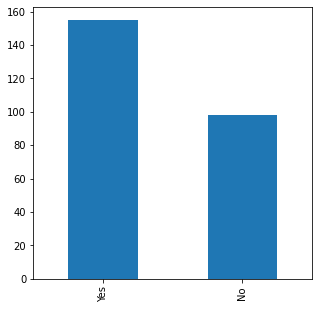

In [25]:
labels_csv["Brain_Tumor"].value_counts().plot.bar(figsize=(5,5));

In [5]:
labels_csv["Brain_Tumor"].value_counts()

Yes    155
No      98
Name: Brain_Tumor, dtype: int64

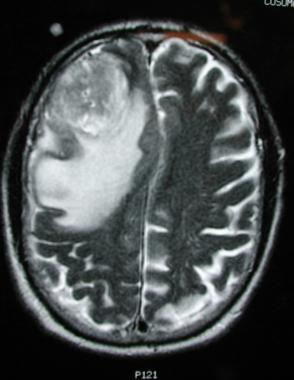

In [6]:
# from IPython.display import Image
Image("/content/drive/MyDrive/Brain Tumor Data/MRI_Images/Y22.jpg")

## Getting images and ther Labels

In [7]:
# Getting path names from image ID's
filenames = ["/content/drive/MyDrive/Brain Tumor Data/MRI_Images/" + fname for fname in labels_csv["ID"]]

# First 10
filenames[:10]

['/content/drive/MyDrive/Brain Tumor Data/MRI_Images/N1.jpg',
 '/content/drive/MyDrive/Brain Tumor Data/MRI_Images/N2.jpg',
 '/content/drive/MyDrive/Brain Tumor Data/MRI_Images/N3.jpg',
 '/content/drive/MyDrive/Brain Tumor Data/MRI_Images/N4.jpg',
 '/content/drive/MyDrive/Brain Tumor Data/MRI_Images/N5.jpg',
 '/content/drive/MyDrive/Brain Tumor Data/MRI_Images/N6.jpg',
 '/content/drive/MyDrive/Brain Tumor Data/MRI_Images/N7.jpg',
 '/content/drive/MyDrive/Brain Tumor Data/MRI_Images/N8.jpg',
 '/content/drive/MyDrive/Brain Tumor Data/MRI_Images/N9.jpg',
 '/content/drive/MyDrive/Brain Tumor Data/MRI_Images/N10.jpg']

In [8]:
# Check file count 
import os
if len(os.listdir("/content/drive/MyDrive/Brain Tumor Data/MRI_Images/")) == len(filenames):
  print("Filenames match actual amount of files! Proceed.")
else:
  print("Filenames do not match actual amount of files, check the target directory")

Filenames match actual amount of files! Proceed.


In [9]:
len(filenames)

253

In [10]:
len(os.listdir("/content/drive/MyDrive/Brain Tumor Data/MRI_Images/"))

253

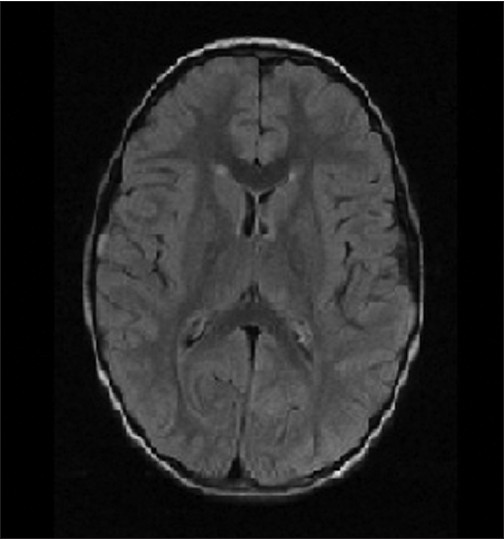

In [11]:
Image(filenames[22])

In [12]:
img = mpimg.imread("/content/drive/MyDrive/Brain Tumor Data/MRI_Images/Y22.jpg")
print(img)

[[[  3   3   3]
  [  3   3   3]
  [  3   3   3]
  ...
  [187 192 198]
  [110 115 121]
  [ 63  68  74]]

 [[  3   3   3]
  [  3   3   3]
  [  3   3   3]
  ...
  [185 190 194]
  [126 131 135]
  [128 133 137]]

 [[  3   3   3]
  [  3   3   3]
  [  3   3   3]
  ...
  [143 148 152]
  [111 116 120]
  [149 154 158]]

 ...

 [[  2   2   2]
  [  2   2   2]
  [  2   2   2]
  ...
  [  1   1   1]
  [  1   1   1]
  [  1   1   1]]

 [[  2   2   2]
  [  2   2   2]
  [  2   2   2]
  ...
  [  1   1   1]
  [  1   1   1]
  [  1   1   1]]

 [[  2   2   2]
  [  2   2   2]
  [  2   2   2]
  ...
  [  1   1   1]
  [  1   1   1]
  [  1   1   1]]]


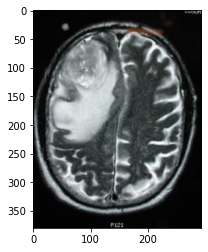

In [13]:
imgplot = plt.imshow(img)

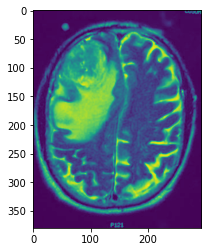

In [14]:
lum_img = img[:,:,0]
plt.imshow(lum_img)

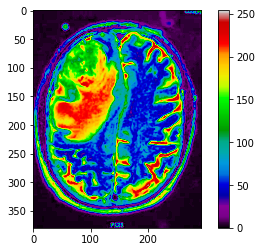

In [15]:
imgplot = plt.imshow(lum_img)
imgplot.set_cmap("nipy_spectral")
plt.colorbar();

## Examining a specific data range

Sometimes you want to enhance the contrast in your image, or expand the contrast in a particular region while sacrificing the detail in colors that don't vary much, or don't matter. A good tool to find interesting regions is the histogram. To create a histogram of our image data, we use the hist() function. (**Note:**Try using in a multivariate dataset instead of a binary one)

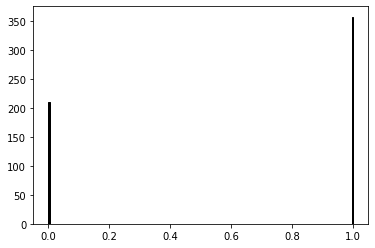

In [16]:
plt.hist(lum_img.ravel(), bins=256, range=(0.0, 1.0), fc='k',ec='k');

In [17]:
labels_csv["Brain_Tumor"][108]

'Yes'

## Prepare labels

In [18]:
# Import numpy as np
labels = labels_csv["Brain_Tumor"].to_numpy()
labels

array(['No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No',
       'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No',
       'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No',
       'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No',
       'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No',
       'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No',
       'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No',
       'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No',
       'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'Yes',
       'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes',
       'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes',
       'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes',
       'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes',
       'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes',

In [19]:
len(labels)

253

In [20]:
# Compare number of labels to file names
if len(labels) == len(filenames):
  print("Number of labels matches number of filenames!")
else:
  print("Number of labels does not match number of filenames, check data directories")

Number of labels matches number of filenames!


In [21]:
# Turn to an array
cipher_Brain_Tumor = np.unique(labels) # Turned into an array
cipher_Brain_Tumor

array(['No', 'Yes'], dtype=object)

In [22]:
print(labels[0])
labels[0] == cipher_Brain_Tumor

No


array([ True, False])

In [23]:
boolean_labels = [label == cipher_Brain_Tumor for label in labels]
boolean_labels[:2]

[array([ True, False]), array([ True, False])]